## GMRF model

In [1]:
import math
import matplotlib.pyplot as plt
import random
import numpy 
import math
import matplotlib.pyplot as plt
import random
from k_means1 import k_means
from scipy import signal
from scipy.spatial.distance import pdist,squareform
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.mlab as mlab 

Sample: D21.gif  and  D55.gif


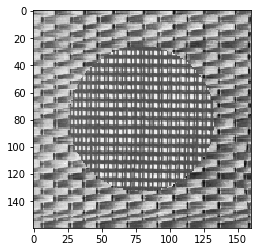

Single-linkage Accuracy: 0.8093116507017153
Ward-linkage Accuracy: 0.9332256627311205
K-means Accuracy: 0.9561706393406104


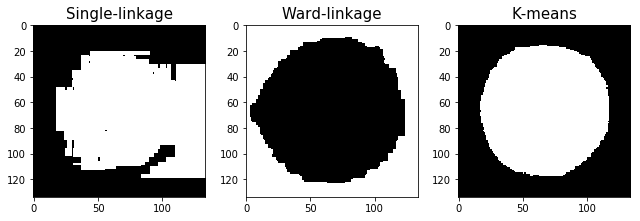

Time: 9.666666666666666 min 

Sample: D21.gif  and  D77.gif


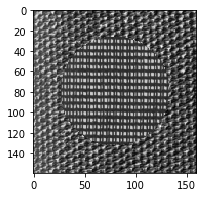

Single-linkage Accuracy: 0.8903430608153263
Ward-linkage Accuracy: 0.9563377144130096
K-means Accuracy: 0.9418578748050791


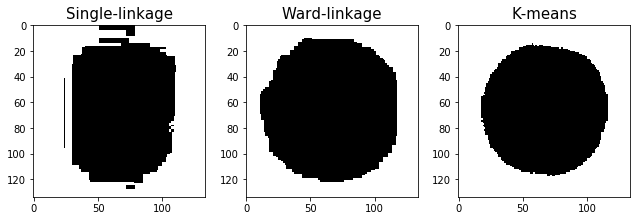

Time: 9.383333333333333 min 

Sample: D55.gif  and  D77.gif


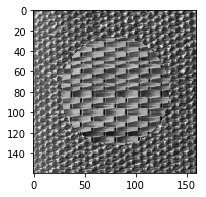

Single-linkage Accuracy: 0.8294720427712186
Ward-linkage Accuracy: 0.8991980396524839
K-means Accuracy: 0.9739362887057251


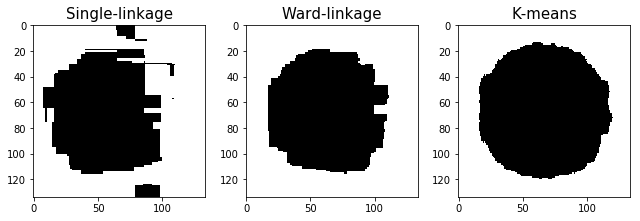

Time: 9.233333333333333 min 



In [2]:
from __future__ import print_function
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
get_ipython().magic(u'matplotlib inline')
from PIL import Image
from collections import Counter
import datetime

def ImageToMatrix(filename):
    im = Image.open(filename)
    width,height = im.size
    im = im.convert("L") 
    data = im.getdata()
    data = np.matrix(data,dtype='float')/255.0
    
    data = data - numpy.mean(data)
    data = data/numpy.std(data)
    
    new_data = np.reshape(data,(height,width))
    return new_data

def MatrixToImage(data):
    data = data*255
    new_im = Image.fromarray(data.astype(np.uint8))
    return new_im

def accu(label):
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    for h in range(len(label)):
        for g in range(len(label[0])):
            if (h+m-(nn-0.5))**2+(g+m-(nn-0.5))**2 > 2859 and label[h][g] ==1:
                count1 += 1
            if (h+m-(nn-0.5))**2+(g+m-(nn-0.5))**2 <= 2859 and label[h][g] ==1:
                count2 += 1
            if (h+m-(nn-0.5))**2+(g+m-(nn-0.5))**2 > 2859 and label[h][g] ==0:
                count3 += 1
            if (h+m-(nn-0.5))**2+(g+m-(nn-0.5))**2 <= 2859 and label[h][g] ==0:
                count4 += 1
    return max(count3+count2, count1+count4)/(len(label)*len(label[0]))

nn=80
n=2*nn
m = round(n**0.5)
fig =['D21.gif','D55.gif','D77.gif']

for k1 in range(len(fig)):
    for k2 in range(k1+1, len(fig)):
        start_time = datetime.datetime.now() 
        print("Sample:",fig[k1]," and ", fig[k2])
        filename1 = fig[k1]
        data1 = ImageToMatrix(filename1)
        data = data1[0:n,0:n]
        filename2 = fig[k2]
        data2 = ImageToMatrix(filename2)
        data2 = data2[0:n,0:n]
        co = 0
        for kk in range(n):
            for jj in range(n):
                if ((kk-(nn-0.5))**2+(jj-(nn-0.5))**2 > 2859):
                    co=co+1
                    data[kk,jj] = data2[kk,jj]
#         print(co/(n**2))
        new_im = MatrixToImage(data)
        plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
        plt.show()


        lis = []
        for i in range(m, n-m):
            for j in range(m, n-m):
                mat = data[i-m:i+m+1,j-m:j+m+1]
                matt = numpy.rot90(mat, 2)/((2*m+1)**2)
                res = signal.convolve2d(mat, matt, mode='full')
                res = res[m:3*m+1,m:3*m+1]
                res = res.flatten().tolist()
                res.append(3*i/n)
                res.append(3*j/n)
                lis.append(res)        

        Z = linkage(lis, 'single')
        ZZ = Z[:,3]
        r= 0
        while ZZ[r] <= ((n-2*m)**2)*0.6:
            r=r+1
        r=r-1
        label = fcluster(Z,Z[r,2],'distance')
#         print(max(Z[0:r,3])/((n-2*m)**2))

        plt.rcParams['figure.figsize'] = (9, 3)
        plt.subplot(1,3,1)

        val = Counter(label).most_common(1)[0][0]
        label = [0 if x!=val else 1 for x in label]
        label1 = np.array(label).reshape(n-2*m,n-2*m)
        accuracy0 = accu(label1)
        print("Single-linkage Accuracy:", accuracy0)
#         print(sum(sum(label1))/(value*2))
        plt.imshow(label1, cmap='gray')
        plt.title('Single-linkage', fontsize =15) 

        plt.subplot(1,3,2)
        clst=cluster.AgglomerativeClustering(n_clusters=2,linkage='ward')
        label11=clst.fit_predict(lis).reshape(n-2*m,n-2*m)
        accuracy1 = accu(label11)
        print("Ward-linkage Accuracy:", accuracy1)
#         print(sum(sum(label11))/(value*2))
        plt.imshow(label11, cmap='gray')
        plt.title('Ward-linkage', fontsize =15)  
     
        plt.subplot(1,3,3)  
        Clu1, label2 = k_means(lis, 2, 10)
        label21 = np.array(label2).reshape(n-2*m,n-2*m)
        accuracy2 = accu(label21)
        print("K-means Accuracy:", accuracy2)
#         print(sum(sum(label11))/(value*2))
        plt.imshow(label21, cmap='gray')
        plt.title('K-means', fontsize =15) 
        plt.tight_layout()
        plt.show() 
        
        end_time = datetime.datetime.now()     
        interval = (end_time-start_time).seconds
        final_time = interval/60.0 
        print ('Time:', final_time, "min","\n")